Importing required libraries.

In [0]:
import cv2
import json
import glob, os
import urllib.request
import matplotlib.pyplot as plt

In [0]:
%cd darknet
!mkdir images

Loading the `Indian_Number_plates.json` file provided as the dataset for the problem statement.   
The file is uploaded at [here](https://drive.google.com/open?id=192Ttq2GAfQ6eque1I39SO66iP8Ulbly3) for easy access.

In [17]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=192Ttq2GAfQ6eque1I39SO66iP8Ulbly3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=192Ttq2GAfQ6eque1I39SO66iP8Ulbly3" -O Indian_Number_plates.json && rm -rf /tmp/cookies.txt

--2019-08-27 15:29:37--  https://docs.google.com/uc?export=download&confirm=&id=192Ttq2GAfQ6eque1I39SO66iP8Ulbly3
Resolving docs.google.com (docs.google.com)... 74.125.204.138, 74.125.204.101, 74.125.204.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6qga5i3mjgo7pruqn9j9jlona6hcd3jg/1566914400000/00369660752892953074/*/192Ttq2GAfQ6eque1I39SO66iP8Ulbly3?e=download [following]
--2019-08-27 15:29:37--  https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6qga5i3mjgo7pruqn9j9jlona6hcd3jg/1566914400000/00369660752892953074/*/192Ttq2GAfQ6eque1I39SO66iP8Ulbly3?e=download
Resolving doc-0c-90-docs.googleusercontent.com (doc-0c-90-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to doc-0c-90-docs.googleusercontent.com (do

In [0]:
base_directory = "/content/darknet"

In [0]:
def sort_lengths(l1, l2):
    r"""Sort the two elements in decreasing order."""
    if l1 > l2:
        lmax, lmin = l1, l2
        return lmax, lmin
    else:
        lmax, lmin = l2, l1
        return lmax, lmin

In [0]:
def convert_to_yolo_annotation_format(x1, y1, x2, y2, size):
    r"""Converts the bounding box coordinates in the Dataturks format to that required by the YOLOv3 architecture."""

    xmax, xmin = sort_lengths(x1, x2)
    ymax, ymin = sort_lengths(y1, y2)

    dw = 1. / size[1]
    dh = 1. / size[0]

    x = (xmin + xmax) / 2.0
    y = (ymin + ymax) / 2.0

    w = xmax - xmin
    h = ymax - ymin

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh

    return (x, y, w, h)

In [0]:
def convert_yolo_annotation_to_corners(box, size):
    r"""Converts the bounding box coordinates in the YOLOv3 format to opposite corners format."""

    h, w = size[0], size[1]

    x1, y1 = int((box[0] + box[2] / 2) * w), int((box[1] + box[3] / 2) * h)
    x2, y2 = int((box[0] - box[2] / 2) * w), int((box[1] - box[3] / 2) * h)

    return (x1, y1, x2, y2)

In [0]:
def process_and_save_data_item(json_string, file_name):
    r"""Process the json string provided, download the image and save the bounding box coordinates in the YOLOv3 format."""

    json_object = json.loads(json_string)

    link = json_object['content']

    # uncomment to retain the filename (however, there are file with same name in the dataset)
    # file_name = json_object['content'][json_object['content'].rfind('_') +1:json_object['content'].rfind('.')]

    extension = link.split('.')[-1]

    w, h = json_object['annotation'][0]['imageWidth'], json_object[
        'annotation'][0]['imageHeight']
    x1, y1 = int(json_object['annotation'][0]['points'][0]['x'] * w), int(
        json_object['annotation'][0]['points'][0]['y'] * h)
    x2, y2 = int(json_object['annotation'][0]['points'][1]['x'] * w), int(
        json_object['annotation'][0]['points'][1]['y'] * h)

    if extension != 'jpeg':
        print("Skipping: " + link)
        # TODO: Handle the image file not in jpeg format (convert to jpeg)
        return

    path, _ = urllib.request.urlretrieve(
        link, base_directory + "/images/" + file_name + "." + extension)

    # TODO: Implement exception handling in case the url/image is malformed.

    img = cv2.imread(path)
    size = img.shape

    yolo_x, yolo_y, yolo_w, yolo_h = convert_to_yolo_annotation_format(
        x1, y1, x2, y2, size)

    with open(base_directory + "/images/" + file_name + '.txt', 'w') as file:
        file.write(
            str(0) + ' ' + str(yolo_x) + ' ' + str(yolo_y) + ' ' +
            str(yolo_w) + ' ' + str(yolo_h))

    print("Saved: " + file_name)

Load the dataset file.

In [0]:
data_file = open('Indian_Number_plates.json', 'r')
json_strings = data_file.readlines()

Process the records in the given json file.

In [25]:
for i in range(len(json_strings)):
    process_and_save_data_item(json_strings[i], "{:04d}".format(i))
    # TODO: Implement multithreading to expedite the downloading process

Saved: 0000
Saved: 0001
Saved: 0002
Saved: 0003
Saved: 0004
Skipping: http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/18d2b870-7817-46da-a59a-6406c1b472c9___1033.png
Saved: 0006
Saved: 0007
Saved: 0008
Saved: 0009
Saved: 0010
Saved: 0011
Saved: 0012
Saved: 0013
Saved: 0014
Saved: 0015
Saved: 0016
Saved: 0017
Saved: 0018
Saved: 0019
Saved: 0020
Saved: 0021
Saved: 0022
Saved: 0023
Saved: 0024
Saved: 0025
Saved: 0026
Saved: 0027
Saved: 0028
Saved: 0029
Saved: 0030
Saved: 0031
Saved: 0032
Saved: 0033
Saved: 0034
Saved: 0035
Saved: 0036
Saved: 0037
Saved: 0038
Saved: 0039
Saved: 0040
Saved: 0041
Saved: 0042
Saved: 0043
Saved: 0044
Saved: 0045
Saved: 0046
Saved: 0047
Saved: 0048
Saved: 0049
Saved: 0050
Saved: 0051
Saved: 0052
Saved: 0053
Saved: 0054
Saved: 0055
Saved: 0056
Saved: 0057
Saved: 0058
Saved: 0059
Saved: 0060
Saved: 0061
Saved: 0062
Saved: 0063
Saved: 0064
Saved: 0065
Saved: 0066
Saved: 0067
Saved: 0068
Saved: 0069
Saved: 0070
Saved: 0071
Saved:

In [26]:
!ls images

0000.jpeg  0034.jpeg  0067.jpeg  0101.jpeg  0137.jpeg  0170.jpeg  0204.jpeg
0000.txt   0034.txt   0067.txt	 0101.txt   0137.txt   0170.txt   0204.txt
0001.jpeg  0035.jpeg  0068.jpeg  0102.jpeg  0138.jpeg  0171.jpeg  0205.jpeg
0001.txt   0035.txt   0068.txt	 0102.txt   0138.txt   0171.txt   0205.txt
0002.jpeg  0036.jpeg  0069.jpeg  0103.jpeg  0139.jpeg  0172.jpeg  0206.jpeg
0002.txt   0036.txt   0069.txt	 0103.txt   0139.txt   0172.txt   0206.txt
0003.jpeg  0037.jpeg  0070.jpeg  0105.jpeg  0140.jpeg  0173.jpeg  0208.jpeg
0003.txt   0037.txt   0070.txt	 0105.txt   0140.txt   0173.txt   0208.txt
0004.jpeg  0038.jpeg  0071.jpeg  0106.jpeg  0141.jpeg  0174.jpeg  0209.jpeg
0004.txt   0038.txt   0071.txt	 0106.txt   0141.txt   0174.txt   0209.txt
0006.jpeg  0039.jpeg  0072.jpeg  0108.jpeg  0142.jpeg  0175.jpeg  0210.jpeg
0006.txt   0039.txt   0072.txt	 0108.txt   0142.txt   0175.txt   0210.txt
0007.jpeg  0040.jpeg  0073.jpeg  0109.jpeg  0143.jpeg  0176.jpeg  0211.jpeg
0007.txt   0040.txt   00

Checking an instance from the dataset.

In [0]:
i1 = open('images/0000.txt')
img = cv2.imread('images/0000.jpeg')
x1, y1, x2, y2 = convert_yolo_annotation_to_corners([float(x) for x in i1.readline().split(" ")[1:]], img.shape)
i1.close()

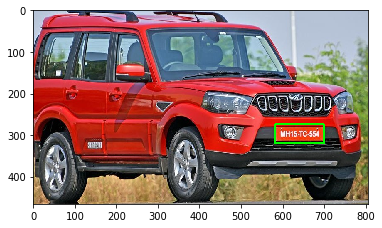

In [43]:
plt.imshow(cv2.rectangle(img,(x1, y1), (x2, y2),(0,255,0),3)[:, :, ::-1])
plt.show()

Splitting the dataset

In [0]:
percentage_test = 10;

file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')

counter = 1  
index_test = round(100 / percentage_test)  

for pathAndFilename in glob.iglob(os.path.join(base_directory + "/images/", "*.jpeg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    if counter == index_test:
        counter = 1
        file_test.write(base_directory + "/images/" + title + '.jpeg' + "\n")
    else:
        file_train.write(base_directory + "/images/" + title + '.jpeg' + "\n")
        counter = counter + 1

file_train.close()
file_test.close()

In [45]:
!head train.txt

/content/darknet/images/0179.jpeg
/content/darknet/images/0053.jpeg
/content/darknet/images/0225.jpeg
/content/darknet/images/0008.jpeg
/content/darknet/images/0127.jpeg
/content/darknet/images/0083.jpeg
/content/darknet/images/0090.jpeg
/content/darknet/images/0196.jpeg
/content/darknet/images/0191.jpeg
/content/darknet/images/0034.jpeg


In [46]:
!head test.txt

/content/darknet/images/0170.jpeg
/content/darknet/images/0231.jpeg
/content/darknet/images/0097.jpeg
/content/darknet/images/0037.jpeg
/content/darknet/images/0033.jpeg
/content/darknet/images/0168.jpeg
/content/darknet/images/0134.jpeg
/content/darknet/images/0018.jpeg
/content/darknet/images/0061.jpeg
/content/darknet/images/0181.jpeg
